### Moving Avaerage Trading Strategy

<p>This project examines the momemtum trading strategy by comparing 20-day-moving average and 7-day moving average close prices of MediaTek's stock. If the momemtum indicates and upward trend, we go to the long position by buying the stock, and if the momemtum is declining, we short the stock. At the end, we compare the accumalated returns from this strategy with the passive strategy by investing money in Yuanta/P-shares Taiwan Top 50 ETF (0050) as a mock of the market. The result exhibits that the momemtum strategy outperforms the market performance in investment returns</p>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tabulate
import seaborn as sns


In [2]:
# Load data into a pandas DataFrame
start_date = '2020-01-01'
end_date = '2023-03-03'


MediaTek = yf.download("2454.TW", start_date, end_date)[["Close"]]
MediaTek.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-01-02,441.5
2020-01-03,434.5
2020-01-06,424.0
2020-01-07,426.0
2020-01-08,430.5


In [3]:
# Calculate the 20-day moving average
ma20 = MediaTek["Close"].rolling(window = 20).mean()

# Calculate the 7-day moving average
ma7 = MediaTek["Close"].rolling(window = 7).mean()

# Create new columns for the moving averages 
MediaTek["MA7"] = ma7
MediaTek["MA20"] = ma20

MediaTek.dropna(inplace = True)

MediaTek.head(5)

C:\Users\USER\AppData\Local\Temp/ipykernel_21456/2517380974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MediaTek["MA7"] = ma7
C:\Users\USER\AppData\Local\Temp/ipykernel_21456/2517380974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MediaTek["MA20"] = ma20
C:\Users\USER\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Close,MA7,MA20
Date,,,
2020-02-07,381.0,384.000000,411.400
2020-02-10,380.0,383.500000,408.325
2020-02-11,390.0,383.785714,406.100
2020-02-12,401.5,386.571429,404.975
2020-02-13,408.5,389.142857,404.100


In [4]:
MediaTek["Signal"] = 0


C:\Users\USER\AppData\Local\Temp/ipykernel_21456/3604347657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MediaTek["Signal"] = 0


In [5]:
# Long position
MediaTek.loc[ma7 > ma20, 'Signal'] = 1

# Short position 
MediaTek.loc[ma7 < ma20, 'Signal'] = -1

MediaTek.head()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Close,MA7,MA20,Signal
Date,,,,
2020-02-07,381.0,384.000000,411.400,-1
2020-02-10,380.0,383.500000,408.325,-1
2020-02-11,390.0,383.785714,406.100,-1
2020-02-12,401.5,386.571429,404.975,-1
2020-02-13,408.5,389.142857,404.100,-1


In [6]:
returns = MediaTek["Close"].pct_change().dropna()
MediaTek["Return"] = returns
MediaTek["StrategyReturn"] = MediaTek["Return"] * MediaTek["Signal"]
MediaTek["Trend"] = MediaTek["Signal"].diff()
MediaTek.dropna(inplace = True)
MediaTek.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_21456/3238410006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MediaTek["Return"] = returns
C:\Users\USER\AppData\Local\Temp/ipykernel_21456/3238410006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MediaTek["StrategyReturn"] = MediaTek["Return"] * MediaTek["Signal"]
C:\Users\USER\AppData\Local\Temp/ipykernel_21456/3238410006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Close,MA7,MA20,Signal,Return,StrategyReturn,Trend
Date,,,,,,,
2020-02-10,380.0,383.500000,408.325,-1,-0.002625,0.002625,0.0
2020-02-11,390.0,383.785714,406.100,-1,0.026316,-0.026316,0.0
2020-02-12,401.5,386.571429,404.975,-1,0.029487,-0.029487,0.0
2020-02-13,408.5,389.142857,404.100,-1,0.017435,-0.017435,0.0
2020-02-14,405.5,392.642857,402.850,-1,-0.007344,0.007344,0.0


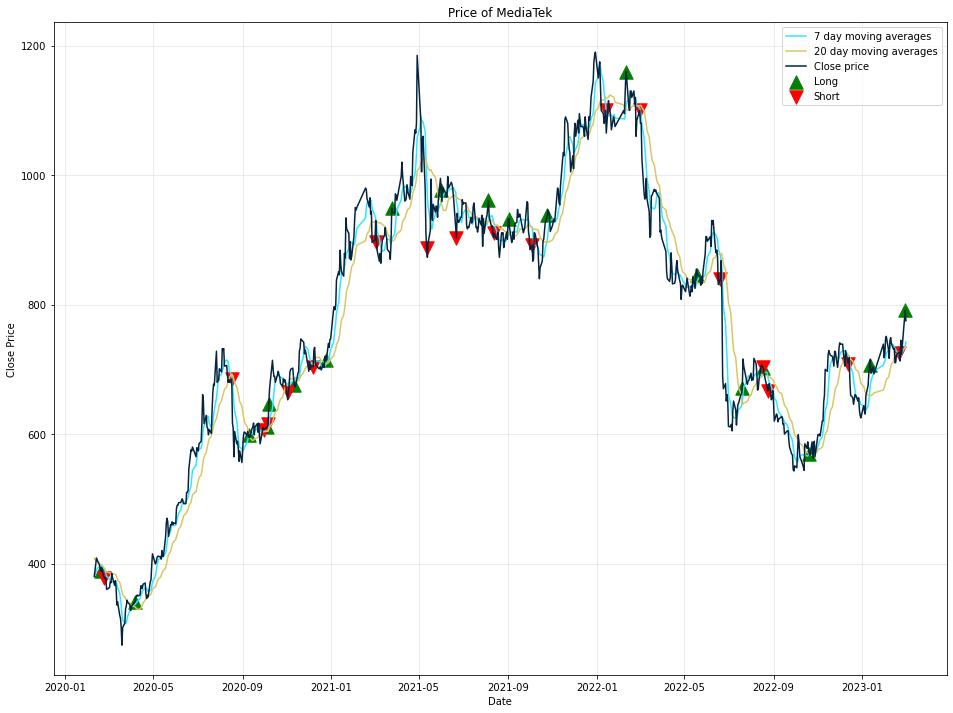

In [33]:
plt.figure(figsize=(16,12))
plt.grid(True, alpha = 0.3)

# plot the close prices and moving aveages
plt.plot(MediaTek["MA7"], label = "7 day moving averages", color = "#2ee6ff")
plt.plot(MediaTek["MA20"], label = "20 day moving averages", color = "#D9C666")
plt.plot(MediaTek["Close"], label = "Close price", color = "#042440")

# plot the signal points
long = MediaTek.loc[MediaTek['Trend'] == 2]
short = MediaTek.loc[MediaTek['Trend'] == -2]
plt.scatter(long.index, long['Close'], marker='^', color='green', label='Long', s = 180)
plt.scatter(short .index, short ['Close'], marker='v', color='red', label='Short', s = 180)

# plot title and coordinates
plt.title("Price of MediaTek")
plt.xlabel("Date")
plt.ylabel("Close Price")

plt.legend()
plt.show()

In [34]:
# Import Yuanta Taiwan ETF 50's data and expropriate the close price
TW50 = yf.download("0050.TW", start_date, end_date)[["Close"]]

# Calculate the returns
TW50_returns = TW50.pct_change()

[*********************100%***********************]  1 of 1 completed


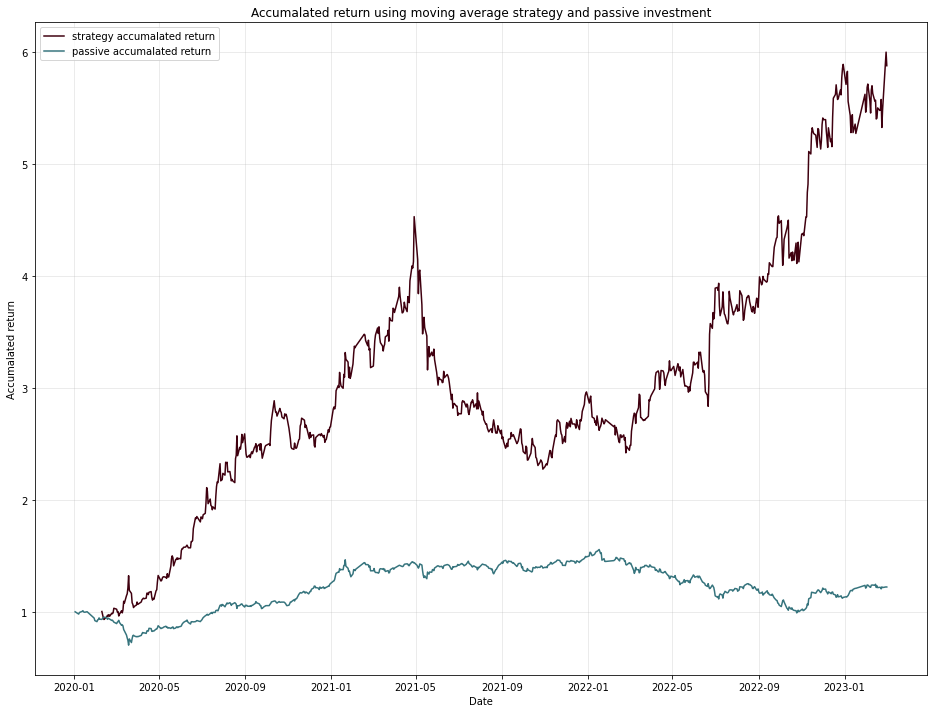

In [36]:
plt.figure(figsize=(16,12))
plt.grid(True, alpha = 0.3)

# calculate the accumulated return of the strategy
strategy_return = (1 + MediaTek['StrategyReturn']).cumprod()

# calculate the accumulated returns of a passive investment in the index
passive_return = (1 + TW50_returns).cumprod()

# plot the accumulated return
plt.plot(strategy_return, label = "strategy accumalated return", color = "#3f000f")
plt.plot(passive_return, label = "passive accumalated return", color = "#36747d")
plt.title("Accumalated return using moving average strategy and passive investment")
plt.xlabel("Date")
plt.ylabel("Accumalated return")
plt.legend()
# show the plot
plt.show()